In [2]:
import fastf1 as f1
from fastf1 import *
import fastf1.plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis of the 2022 Hungarian GP 

### Introduction

From the opening laps of the 2022 season, two teams have looked dominant in this year's battle for the F1 championship. Early engine problems however cost Red Bull valuable points allowing Charles Leclerc and Ferrari to take a strong lead at the start. But Max Verstappen and Red Bull fired back winnning 6 of 9 races and gaining a 63 point lead in the World Driver's Championship (WDC) as they headed to Hungary before the summer break.

Hungary looked like a weekend where Ferrari could have a strong performance and reduce Verstappen's advantage. During practice, the Ferrari's looked as though they would be setting the pace for the weekend as they topped the charts in free practice. To further solidify their weekend, the Red Bull of Max Verstappen suffered an engine problem during qualifying seeing him start the race in 10th place with the Ferrari's in 2nd and 3rd.

Unfortunately, for Ferrari fans Max Verstappen would go on to win the Hungarian Grand Prix further cementing his lead in the 2022 WDC. During the race, many people questioned Ferrari's strategy calls and blamed them for the poor performance. 

<p style = "text-align:center;"><img src= "./images/Ferrari Clown.jpg" width = "400" height = "400"/></p>

This analysis will focus on trying to determine if the strategy used by Ferrari was appropriate or if the memes are true.

In [6]:

#Enable the cache
f1.Cache.enable_cache('cache')

#Get session data from Hungarian GP 2022
session = f1.get_session(2022, 'Hungary', 'R')

#Load session data
session.load()


core           INFO 	Loading data for Hungarian Grand Prix - Race [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '55', '11', '16', '4', '14', '31', '5', '18', '10', '24', '47', '3', '20', '23', '6', '22', '77']


In [7]:

#Convert lap data to pandas dataframe
laps_df = pd.DataFrame(session.laps.pick_drivers(['VER', 'LEC']).reset_index(drop = True))

#Convert lap times to seconds
laps_df['LapTime'] = laps_df['LapTime'].dt.total_seconds()


### Start of the Race

Although, he started in 10th place, beating Max Verstappen and the Red Bull team is still the primary objective for Ferrari. The new 2022 regulations allow for drivers to start on tires different from those they used in qualifying. This meant that Verstappen could attempt to implement a different tire stategy for the race and Red Bull could attempt to make up crucial places lost from a poor qualifying.

We can see below in Figure 1 that Red Bull clearly thought this would give them the best chances to make up time. They chose to use the red soft tires to start, where many other drivers in the top ten, in particular the Ferraris, chose to start on the yellow medium tire.

<p> Figure 1: </p>
<p style = "text-align:center;"> <img src= "./images/Tyre Compound.PNG" width = "500" height = "300"/></p>

This means that Ferrari will likely be slower on the harder compound of tire, but will be able to drive more laps before needing to make a pitstop.

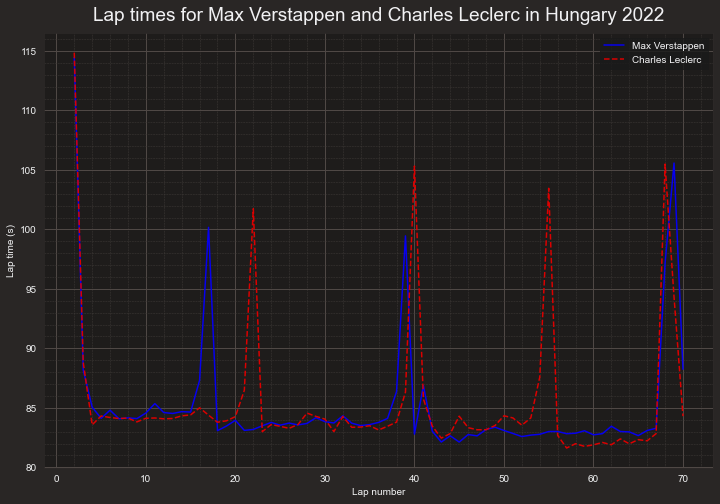

In [32]:
#Set template
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, color_scheme = 'fastf1', misc_mpl_mods = True)

#Get laps for Max Verstappen and Charles Leclerc
laps_df = laps_df[(laps_df['Driver'] == 'VER') | (laps_df['Driver'] == 'LEC')]

rbr_color = fastf1.plotting.team_color('RBR')
fer_color = fastf1.plotting.team_color('FER')

fix, ax = plt.subplots(figsize = (12, 8))
ax.set_title('Lap times for Max Verstappen and Charles Leclerc in Hungary 2022')
ax.set_xlabel('Lap number')
ax.set_ylabel('Lap time (s)')

#sns.set_style('darkgrid')
ax.plot(laps_df[laps_df['Driver'] == 'VER']['LapNumber'], laps_df[laps_df['Driver'] == 'VER']['LapTime'], color = rbr_color, label = 'Max Verstappen')
ax.plot(laps_df[laps_df['Driver'] == 'LEC']['LapNumber'], laps_df[laps_df['Driver'] == 'LEC']['LapTime'], color = fer_color, label = 'Charles Leclerc', linestyle = '--') 

ax.legend()
plt.show()

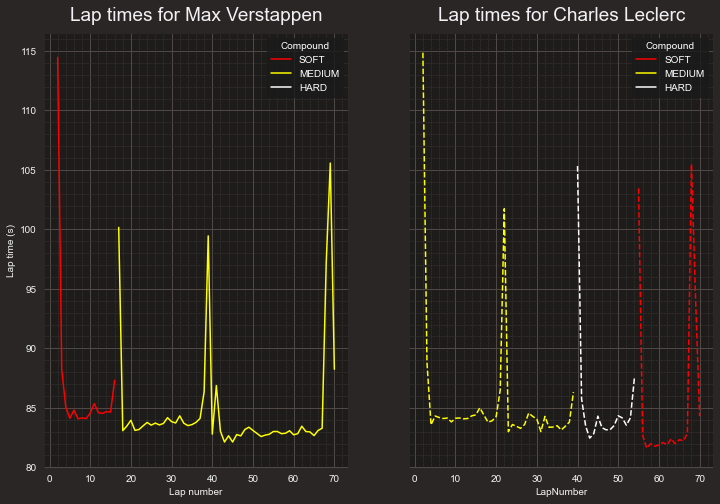

In [47]:

fastf1.plotting.setup_mpl(mpl_timedelta_support=False)

#Create dictionary for tyre compounds
tyre_compounds = {'SOFT': 'red', 'MEDIUM': 'yellow', 'HARD': 'white'}

#Line plot of lap times for Max Verstappen by compound
fix, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 8), sharey = True)
ax1.set_title('Lap times for Max Verstappen')
ax1.set_xlabel('Lap number')
ax1.set_ylabel('Lap time (s)')


ax2.set_title('Lap times for Charles Leclerc')

#seaborn line plot
sns.set_style('darkgrid')
ax1 = sns.lineplot(data = laps_df[laps_df['Driver'] == 'VER'], x = 'LapNumber', y = 'LapTime', hue = 'Compound', palette = tyre_compounds, ax = ax1, hue_order=['SOFT', 'MEDIUM', 'HARD'])
ax2 = sns.lineplot(data = laps_df[laps_df['Driver'] == 'LEC'], x = 'LapNumber', y = 'LapTime', hue = 'Compound', palette = tyre_compounds, hue_order = ['SOFT', 'MEDIUM', 'HARD'], ax = ax2)
ax2.lines[0].set_linestyle("--")
ax2.lines[1].set_linestyle("--")
ax2.lines[2].set_linestyle("--")

#Change legend text colour to white
for text in ax1.get_legend().get_texts():
    text.set_color('white')
for text in ax2.get_legend().get_texts():
    text.set_color('white')

#Change legend title text colour to white
ax1.get_legend().get_title().set_color('white')
ax2.get_legend().get_title().set_color('white')

plt.show()


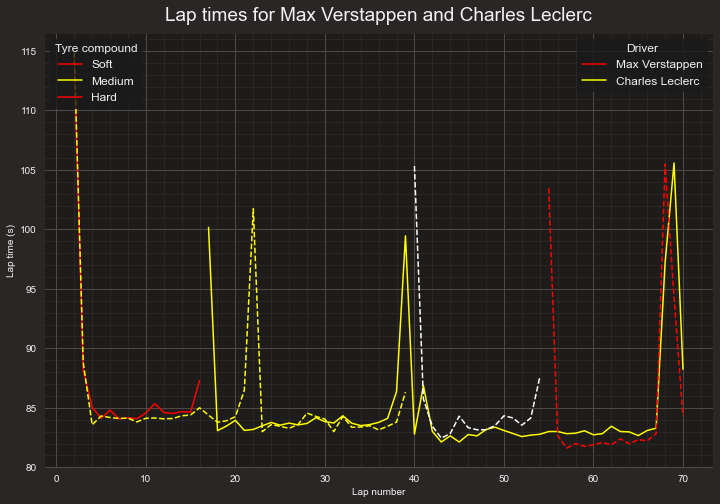

In [76]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=False)

#Create dictionary for tyre compounds
tyre_compounds = {'SOFT': 'red', 'MEDIUM': 'yellow', 'HARD': 'white'}

#Line plot of lap times for Max Verstappen by compound
fix, ax = plt.subplots( figsize = (12, 8), sharey = True)
ax.set_title('Lap times for Max Verstappen and Charles Leclerc')
ax.set_xlabel('Lap number')
ax.set_ylabel('Lap time (s)')


#seaborn line plot
sns.lineplot(data = laps_df[laps_df['Driver'] == 'VER'], x = 'LapNumber', y = 'LapTime', hue = 'Compound', palette = tyre_compounds, hue_order=['SOFT', 'MEDIUM', 'HARD'])
sns.lineplot(data = laps_df[laps_df['Driver'] == 'LEC'], x = 'LapNumber', y = 'LapTime', hue = 'Compound', palette = tyre_compounds, hue_order = ['SOFT', 'MEDIUM', 'HARD'], legend=False)
ax.lines[5].set_linestyle("--")
ax.lines[6].set_linestyle("--")
ax.lines[7].set_linestyle("--")

#Add additional legend
driver_legend = plt.legend(['Max Verstappen', 'Charles Leclerc'], loc = 'upper right', title = 'Driver', title_fontsize = 12, fontsize = 12)
plt.legend(['Soft', 'Medium', 'Hard'], loc = 'upper left', title = 'Tyre compound', title_fontsize = 12, fontsize = 12 )
plt.gca().add_artist(driver_legend)
plt.show()



In [84]:
laps_df.info()
laps_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 419
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                140 non-null    timedelta64[ns]
 1   DriverNumber        140 non-null    object         
 2   LapTime             138 non-null    float64        
 3   LapNumber           140 non-null    int64          
 4   Stint               140 non-null    int64          
 5   PitOutTime          7 non-null      timedelta64[ns]
 6   PitInTime           5 non-null      timedelta64[ns]
 7   Sector1Time         138 non-null    timedelta64[ns]
 8   Sector2Time         140 non-null    timedelta64[ns]
 9   Sector3Time         140 non-null    timedelta64[ns]
 10  Sector1SessionTime  138 non-null    timedelta64[ns]
 11  Sector2SessionTime  140 non-null    timedelta64[ns]
 12  Sector3SessionTime  140 non-null    timedelta64[ns]
 13  SpeedI1             110 non-null   

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:42.565000,1,NaN,1,1,0 days 00:26:07.764000,NaT,NaT,0 days 00:00:32.843000,0 days 00:00:26.532000,...,False,SOFT,2.0,False,0 days 01:02:05.807000,Red Bull Racing,VER,26,False,2022-07-31 13:03:06.185
1,0 days 01:05:37.025000,1,114.460,2,1,NaT,NaT,0 days 00:00:48.472000,0 days 00:00:33.956000,0 days 00:00:32.032000,...,False,SOFT,3.0,False,0 days 01:03:42.565000,Red Bull Racing,VER,6,False,2022-07-31 13:04:42.943
2,0 days 01:07:05.216000,1,88.191,3,1,NaT,NaT,0 days 00:00:33.699000,0 days 00:00:30.743000,0 days 00:00:23.749000,...,False,SOFT,4.0,False,0 days 01:05:37.025000,Red Bull Racing,VER,67,False,2022-07-31 13:06:37.403
3,0 days 01:08:30.274000,1,85.058,4,1,NaT,NaT,0 days 00:00:30.148000,0 days 00:00:31.114000,0 days 00:00:23.796000,...,False,SOFT,5.0,False,0 days 01:07:05.216000,Red Bull Racing,VER,1,True,2022-07-31 13:08:05.594
4,0 days 01:09:54.395000,1,84.121,5,1,NaT,NaT,0 days 00:00:29.811000,0 days 00:00:30.698000,0 days 00:00:23.612000,...,False,SOFT,6.0,False,0 days 01:08:30.274000,Red Bull Racing,VER,1,True,2022-07-31 13:09:30.652


In [85]:
pos = session.pos_data

#Convert position data to pandas dataframe
pos

{'1':                          Date   Status     X   Y     Z Source  \
 0     2022-07-31 12:02:00.298  OnTrack     0   0     0    pos   
 1     2022-07-31 12:02:00.478  OnTrack     0   0     0    pos   
 2     2022-07-31 12:02:00.778  OnTrack     0   0     0    pos   
 3     2022-07-31 12:02:00.838  OnTrack     0   0     0    pos   
 4     2022-07-31 12:02:01.098  OnTrack     0   0     0    pos   
 ...                       ...      ...   ...  ..   ...    ...   
 33122 2022-07-31 14:47:41.358  OnTrack -1299 -68  2381    pos   
 33123 2022-07-31 14:47:41.578  OnTrack -1299 -68  2381    pos   
 33124 2022-07-31 14:47:42.098  OnTrack -1299 -68  2381    pos   
 33125 2022-07-31 14:47:42.398  OnTrack -1299 -68  2381    pos   
 33126 2022-07-31 14:47:42.678  OnTrack -1299 -68  2381    pos   
 
                         Time            SessionTime  
 0     0 days 00:00:59.920000 0 days 00:00:59.920000  
 1     0 days 00:01:00.100000 0 days 00:01:00.100000  
 2     0 days 00:01:00.400000 0 days

In [78]:
#Get laps where pitstop occured
pit_df = laps_df[laps_df['PitInTime'].notnull()][['DriverNumber', 'LapNumber', 'Driver', 'Compound']]
pit_df

#Get driver positions
pos_df = laps_df[laps_df['Position']]

KeyError: 'Position'